# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('data.csv')

In [44]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [46]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [47]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [48]:
data['days_employed'] = data['days_employed'].abs()

In [49]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

In [50]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [51]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [52]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [53]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [54]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [55]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [56]:
data['education'] = data['education'].str.lower()

In [57]:
data.duplicated().sum()

71

In [58]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [59]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [60]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [61]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.



In [62]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [63]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [64]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


,Кол-во клиентов,Кол-во должников,Доля невозврата
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


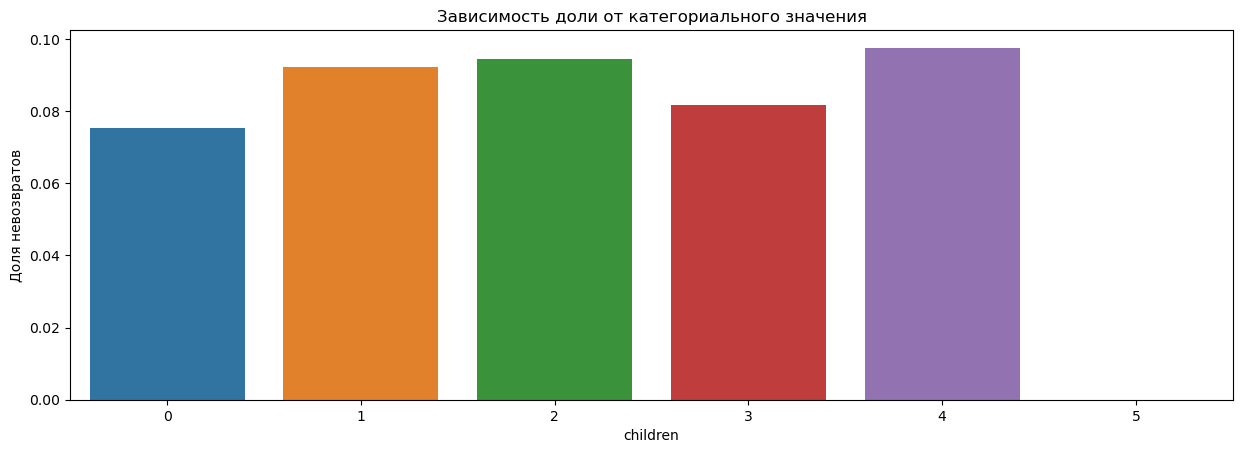

In [65]:
#Написал pivot функцию с визуализацией в seaborn
def pivot(data, index):
    pivot = pd.pivot_table(data, values='debt', index=index, aggfunc = ['count', 'sum', 'mean'])
    pivot.columns = ['Кол-во клиентов', 'Кол-во должников', 'Доля невозврата']
    display(pivot.sort_values('Доля невозврата', ascending = False))
    plt = sns.barplot(x=pivot.index, y='Доля невозврата', data=pivot)
    plt.set(xlabel=index, ylabel='Доля невозвратов', title='Зависимость доли от категориального значения')
    plt.figure.set_figwidth(15)

    
pivot(data, 'children')

In [66]:
display(data.loc[data['children'] == 5])
#Клиентов с пятью детьми мало, их можно не учитывать в общей статистике, 
#а отсутствие задолженностей может быть простым совпадением

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
3979,5,1572.328285,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью
15822,5,418.199982,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью
16211,5,387.317579,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы
20452,5,268.425464,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования
20837,5,2386.600221,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью


**Вывод:** Клиенты без детей в среднем имеют меньше задолженностей по кредитам

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


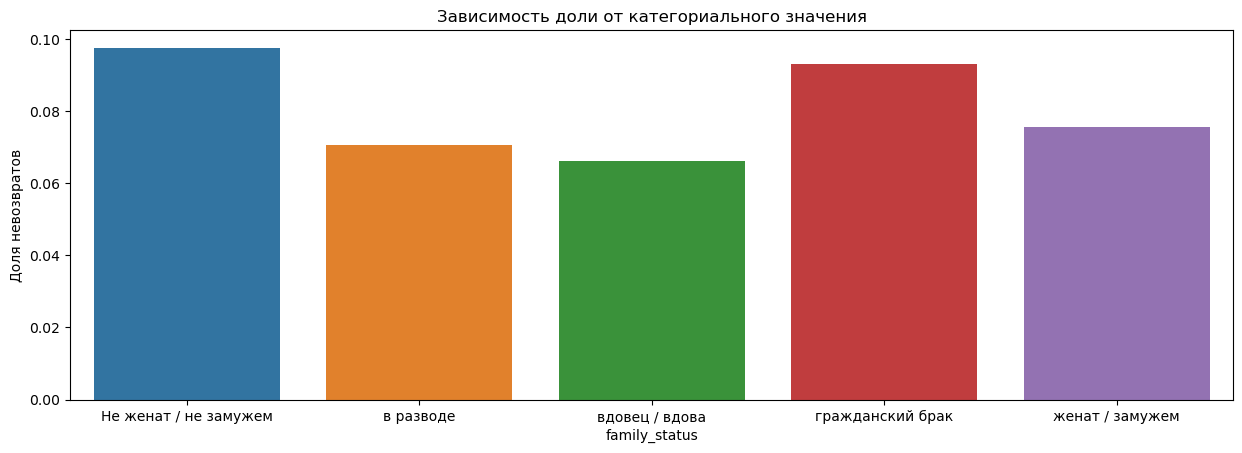

In [67]:
pivot(data, 'family_status')

**Вывод:** Наименьшую среднюю задолженность имеют клиенты в разводе и вдовцы. Наибольшую - не состоящие в браке клиенты.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


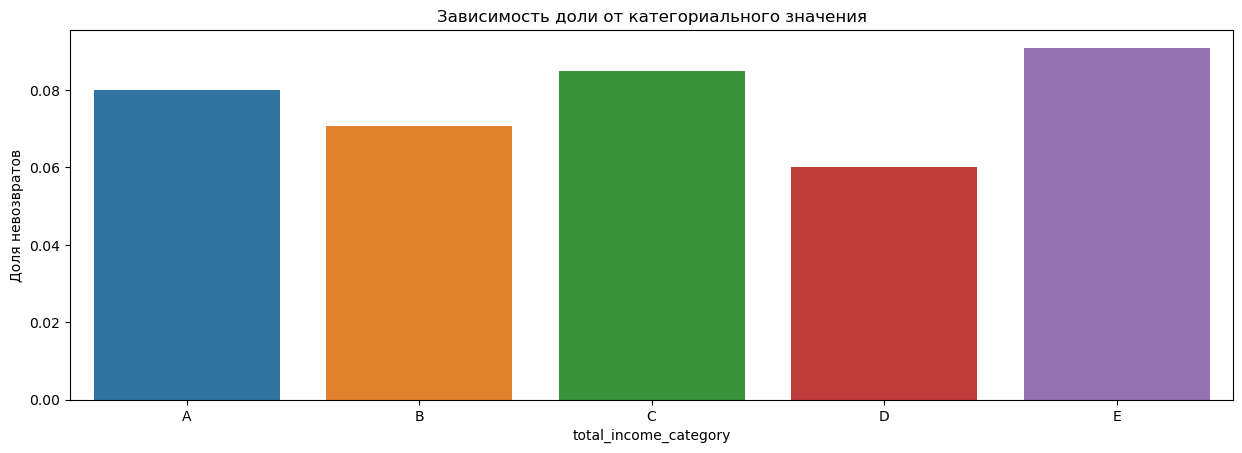

In [68]:
pivot(data, 'total_income_category')

**Вывод:** Среди двух самых крупных категорий - B и C, средняя задолженность категории B ниже

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,Кол-во клиентов,Кол-во должников,Доля невозврата
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


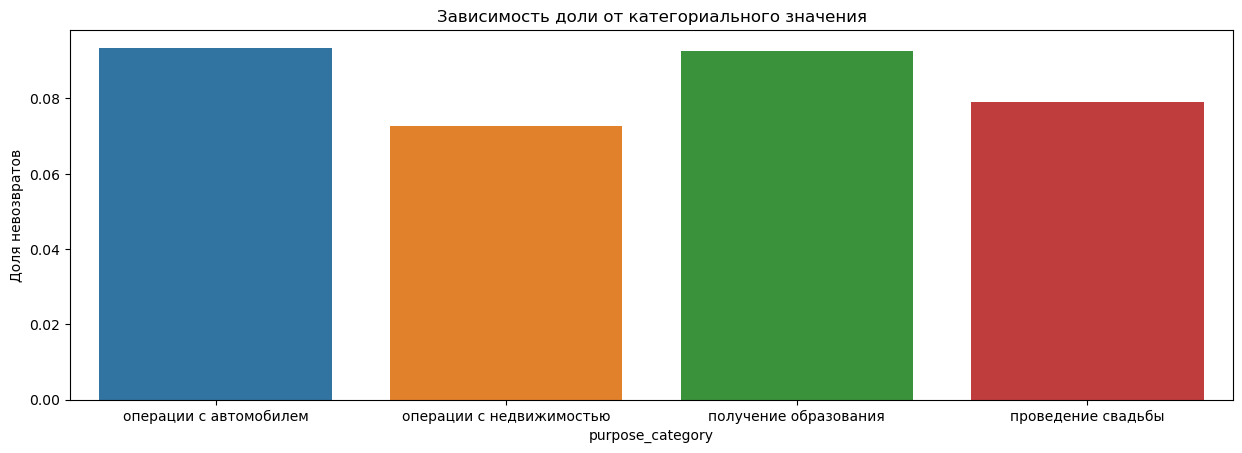

In [69]:
pivot(data, 'purpose_category')

**Вывод:** Для автокредитов и образовательных кредитов уровень средней задолженности выше, чем для кредитов на проведение свадьбы и операции с недвижимостью

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски могли появиться вследствие человеческого фактора: данные могли не потребовать и/или не ввести. Также данные могли быть потеряны из-за технической ошибки, например, при выгрузке данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана позволяет сгладить влияние выбросов, а также не искажает данные.

### Шаг 4: общий вывод.

При создании алгоритма скоринга нужно учесть следующие факторы риска:
1. Дети: отсутствие детей - лучше
2. Семейный статус: клиенты в разводе и вдовцы - лучше
3. Категория кредита: кредиты на свадьбу и недвижимость - лучше
4. Категория дохода: B лучше C


Дополнительно можно исследовать зависимость средней задолженности от возраста и пола клиента, также можно разделить клиентов на более узкие сегменты и проанализировать их.